<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Langkah%20Demi%20Langkah%20Panduan%20Praktis%20Analisis%20Sentimen/Gojek_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/Dataset/gojek_review_sentiment.csv')
data.head()

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive


In [ ]:
data['review'].duplicated().sum()

2

In [ ]:
data.isnull().sum()

review    0
rate      0
dtype: int64

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:

data = data.drop_duplicates()
data

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,positive
1,Aplikasi ini banyak membantu saya. Sekarang sa...,positive
2,Mengerikan. Antarmukanya sangat membingungkan....,negative
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,positive
4,Aplikasi ini sebenarnya bagus dan sangat memba...,positive
...,...,...
1777,Jelas lebih baik daripada yang lain di luar sa...,positive
1778,"Untuk ruang penyimpanan yang luas, buatlah sed...",negative
1779,"Aplikasi yang sangat bagus, beri kami lebih ba...",positive
1780,cintai ini terutama ketika Anda membutuhkan tr...,positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah label menjadi nilai numerik
data['rate'] = label_encoder.fit_transform(data['rate'])

In [ ]:
data.head()

,review,rate
0,Apa aplikasi yang bagus untuk dengan mudah per...,1
1,Aplikasi ini banyak membantu saya. Sekarang sa...,1
2,Mengerikan. Antarmukanya sangat membingungkan....,0
3,Aplikasi yang cukup mengesankan. Butuh waktu l...,1
4,Aplikasi ini sebenarnya bagus dan sangat memba...,1


#Preprocessing

In [ ]:
# Fungsi untuk menghapus tanda baca
def clean_text(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    return text

In [ ]:
data['review']=data['review'].apply(clean_text)
data.head()

,review,rate
0,apa aplikasi yang bagus untuk dengan mudah per...,1
1,aplikasi ini banyak membantu saya sekarang say...,1
2,mengerikan antarmukanya sangat membingungkan s...,0
3,aplikasi yang cukup mengesankan butuh waktu le...,1
4,aplikasi ini sebenarnya bagus dan sangat memba...,1


#Tokenize

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan fungsi tokenisasi pada setiap elemen di kolom 'review_text'
data['review'] = data['review'].apply(tokenize_text)
data

,review,rate
0,"[apa, aplikasi, yang, bagus, untuk, dengan, mu...",1
1,"[aplikasi, ini, banyak, membantu, saya, sekara...",1
2,"[mengerikan, antarmukanya, sangat, membingungk...",0
3,"[aplikasi, yang, cukup, mengesankan, butuh, wa...",1
4,"[aplikasi, ini, sebenarnya, bagus, dan, sangat...",1
...,...,...
1777,"[jelas, lebih, baik, daripada, yang, lain, di,...",1
1778,"[untuk, ruang, penyimpanan, yang, luas, buatla...",0
1779,"[aplikasi, yang, sangat, bagus, beri, kami, le...",1
1780,"[cintai, ini, terutama, ketika, anda, membutuh...",1


#Stopword Removal

In [ ]:
pip install sastrawi

In [ ]:
sw = stopwords.words('indonesian')
# Fungsi untuk menghapus stopwords dari token-token kata
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return filtered_tokens

# Menghapus stopwords dari kolom 'Tokenized Text'
data['review'] = data['review'].apply(remove_stopwords)
data

,review,rate
0,"[aplikasi, bagus, mudah, pergi, memiliki, sepe...",1
1,"[aplikasi, membantu, sanasini, pergi, pergi, r...",1
2,"[mengerikan, antarmukanya, membingungkan, pili...",0
3,"[aplikasi, mengesankan, butuh, mengunduh, meng...",1
4,"[aplikasi, bagus, membantu, voucher, membingun...",1
...,...,...
1777,"[rumah, tujuan]",1
1778,"[ruang, penyimpanan, luas, buatlah, sederhana,...",0
1779,"[aplikasi, bagus, opsi, mencegah, lintas]",1
1780,"[cintai, membutuhkan, transportasi, cepat, mur...",1


#Lematization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(words):
    return [stemmer.stem(word) for word in words]

In [ ]:
# Menerapkan fungsi stemming pada kolom 'full_text'
data['review'] = data['review'].apply(stemming)



In [ ]:
data['review'] = data['review'].apply(lambda x: ' '.join(x))
data

,review,rate
0,aplikasi bagus mudah pergi milik sepeda motor ...,1
1,aplikasi bantu sanasini pergi pergi rumah lapa...,1
2,keri antarmuka bingung pilih mobil antarmuka keri,0
3,aplikasi kesan butuh unduh menginstal thqn tah...,1
4,aplikasi bagus bantu voucher bingung,1
...,...,...
1777,rumah tuju,1
1778,ruang simpan luas buat sederhana efektif,0
1779,aplikasi bagus opsi cegah lintas,1
1780,cinta butuh transportasi cepat murah bagus layan,1


In [ ]:
data

,review,rate
0,"[aplikasi, bagus, mudah, pergi, milik, sepeda,...",1
1,"[aplikasi, bantu, sanasini, pergi, pergi, ruma...",1
2,"[keri, antarmuka, bingung, pilih, mobil, antar...",0
3,"[aplikasi, kesan, butuh, unduh, menginstal, th...",1
4,"[aplikasi, bagus, bantu, voucher, bingung]",1
...,...,...
1777,"[rumah, tuju]",1
1778,"[ruang, simpan, luas, buat, sederhana, efektif]",0
1779,"[aplikasi, bagus, opsi, cegah, lintas]",1
1780,"[cinta, butuh, transportasi, cepat, murah, bag...",1


#Pembuatan Model

In [ ]:
# Memisahkan data latih dan data uji
X = data['review']
y = data['rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1424,) (1424,)
(356,) (356,)


In [ ]:
# Mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
# Melatih model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [ ]:
# Memprediksi dan mengevaluasi model
y_pred = model.predict(X_test_vectors)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.898876404494382


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       219
           1       0.86      0.88      0.87       137

    accuracy                           0.90       356
   macro avg       0.89      0.90      0.89       356
weighted avg       0.90      0.90      0.90       356



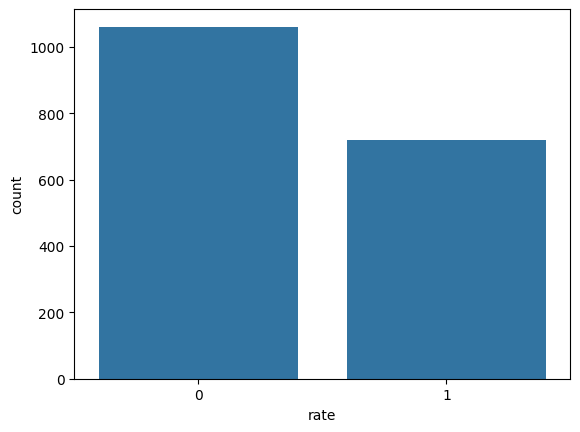

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rate', data=data)
plt.show()


In [ ]:
import joblib

# Menyimpan model dan vectorizer
joblib.dump(model, '/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/gojek_review.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/vectorizergojek.pkl')

['/content/drive/MyDrive/SIB - Bisa AI Academy/WEBINAR/Langkah demi Langkah : Panduan Praktik Analisis Sentiment dengan Python/vectorizergojek.pkl']